In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

## Importation du fichier csv commandes 

In [52]:
data=pd.read_csv('../base/commandesV2.csv',sep=';', encoding='utf-8')

In [53]:
data.head()

,id_commande,date_commande,id_produit,quantité,entrepôt,statut
0,O000001,2024-09-03,P00413,2,Marseille,Livré
1,O000002,2024-11-09,P00778,15,Lyon,Expédié
2,O000004,2024-11-03,P00535,8,Lyon,Livré
3,O000006,2024-01-24,P00898,3,Paris,Livré
4,O000007,2024-02-15,P00445,1,Lyon,Livré


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42404 entries, 0 to 42403
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_commande    42404 non-null  object
 1   date_commande  42404 non-null  object
 2   id_produit     42404 non-null  object
 3   quantité       42404 non-null  int64 
 4   entrepôt       42404 non-null  object
 5   statut         42404 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.9+ MB


## Convertir la date de objet a Date Time

In [55]:
data['date_commande'] = pd.to_datetime(data['date_commande'], errors='coerce')


In [56]:
data['date_commande'].dtype  # doit afficher datetime64[ns]


dtype('<M8[ns]')

## Vérification des valeurs nulles 

In [57]:
data.isnull().sum()

id_commande      0
date_commande    0
id_produit       0
quantité         0
entrepôt         0
statut           0
dtype: int64

In [62]:
data.duplicated().sum()


np.int64(0)

## Stat descriptive 

In [59]:
# Colonnes numériques
data[['quantité']].describe().T

,count,mean,std,min,25%,50%,75%,max
quantité,42404.0,4.788817,4.462332,1.0,2.0,3.0,8.0,20.0


In [60]:
# Colonnes numériques
data[['statut', 'entrepôt', 'id_produit']].describe().T


,count,unique,top,freq
statut,42404,2,Livré,29739
entrepôt,42404,3,Paris,14230
id_produit,42404,1000,P00620,227


# Visualisations

## Top 10 des produits les plus commandés 
### 🎯 Objectif : Identifier les produits les plus demandés

Ce graphique présente les 10 produits ayant généré le plus de volume en termes de quantité commandée.  
Il permet de repérer les produits "stars" qui représentent une part importante de l'activité.


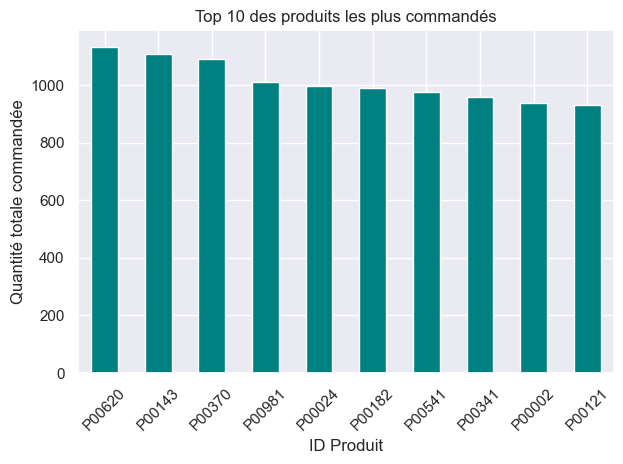

In [28]:
top_produits = data.groupby('id_produit')['quantité'].sum().sort_values(ascending=False).head(10)
top_produits.plot(kind='bar', color='teal')
plt.title("Top 10 des produits les plus commandés")
plt.xlabel("ID Produit")
plt.ylabel("Quantité totale commandée")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Produit avec la quantité moyenne la plus élevée

### 🎯 Objectif : Analyser les produits commandés en grande quantité par commande

Ce graphique montre les produits pour lesquels, lorsqu'ils sont commandés, les clients en prennent beaucoup à la fois.  
Cela peut révéler des produits vendus en gros, en pack, ou à usage industriel.



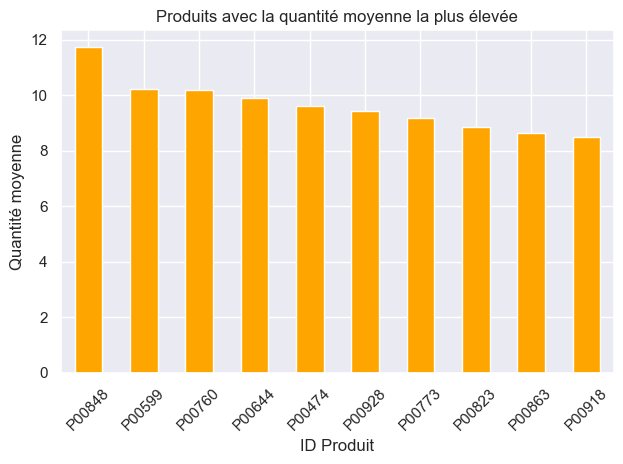

In [29]:
top_moyenne = data.groupby('id_produit')['quantité'].mean().sort_values(ascending=False).head(10)
top_moyenne.plot(kind='bar', color='orange')
plt.title("Produits avec la quantité moyenne la plus élevée")
plt.xlabel("ID Produit")
plt.ylabel("Quantité moyenne")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Produits les plus frequemments commandés 

### 🎯 Objectif : Identifier les produits les plus fréquemment achetés

Ce graphique affiche les produits qui reviennent le plus souvent dans les commandes, indépendamment de la quantité.  
Cela permet de détecter les produits les plus populaires en fréquence.


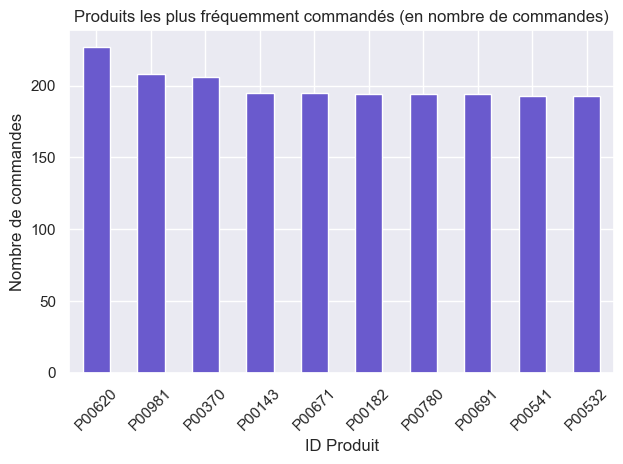

In [30]:
nb_commandes = data['id_produit'].value_counts().head(10)
nb_commandes.plot(kind='bar', color='slateblue')
plt.title("Produits les plus fréquemment commandés (en nombre de commandes)")
plt.xlabel("ID Produit")
plt.ylabel("Nombre de commandes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ScatterPlot frequence vs quantité 

### ## 🎯 Objectif : Analyse croisée fréquence vs quantité

Ce graphique met en relation :
- L’axe X : le **nombre de commandes** par produit (fréquence)
- L’axe Y : la **quantité totale** commandée par produit

Il permet d’identifier plusieurs **profils de produits** :
- 📦 **Produits à forte quantité mais peu fréquents** (gros volumes occasionnels)
- 🛒 **Produits fréquents mais à faible volume** (populaires en petite quantité)
- 🌟 **Produits en top volume et top fréquence** (produits stratégiques)

Cette analyse visuelle aide à orienter les stratégies d’approvisionnement, de stockage, et de mise en avant commerciale.


In [31]:
# Création du DataFrame synthèse à partir de ton df de commandes
frequence = data['id_produit'].value_counts()
quantite_totale = data.groupby('id_produit')['quantité'].sum()
quantite_moyenne = data.groupby('id_produit')['quantité'].mean()

# Création du DataFrame de synthèse
synthese_produits = pd.DataFrame({
    'nombre_commandes': frequence,
    'quantité_totale': quantite_totale,
    'quantité_moyenne': quantite_moyenne
})

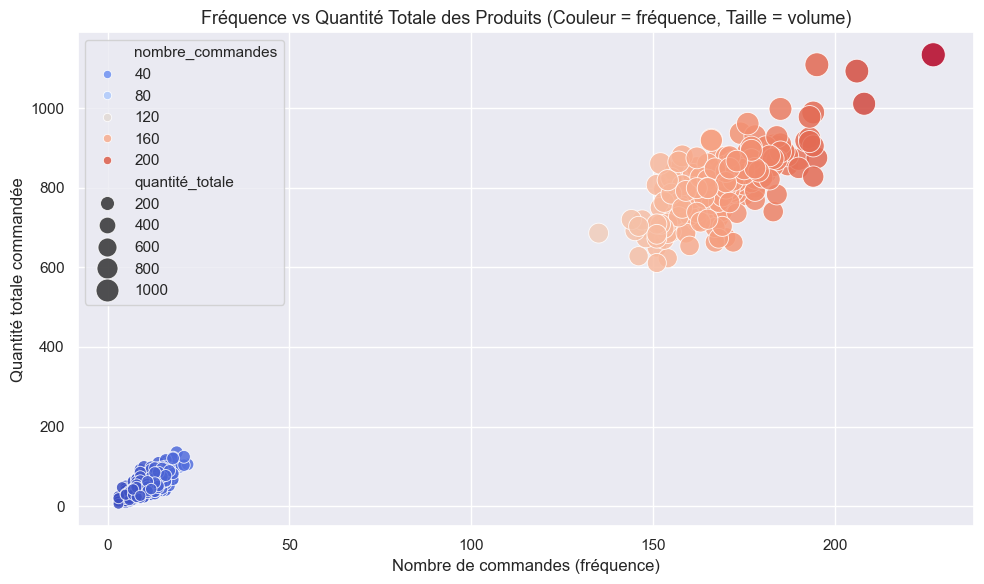

In [32]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=synthese_produits,
    x='nombre_commandes',
    y='quantité_totale',
    hue='nombre_commandes',           # Couleur selon la fréquence
    size='quantité_totale',           # Taille selon quantité totale
    sizes=(60, 300),                  # Ajuste l’échelle des bulles
    palette='coolwarm',
    alpha=0.85,
    legend='brief'
)

plt.title("Fréquence vs Quantité Totale des Produits (Couleur = fréquence, Taille = volume)", fontsize=13)
plt.xlabel("Nombre de commandes (fréquence)")
plt.ylabel("Quantité totale commandée")
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
# Création du DataFrame synthèse sur TES DONNÉES
frequence = data['id_produit'].value_counts()
quantite_totale = data.groupby('id_produit')['quantité'].sum()
quantite_moyenne = data.groupby('id_produit')['quantité'].mean()

synthese_produits = pd.DataFrame({
    'nombre_commandes': frequence,
    'quantité_totale': quantite_totale,
    'quantité_moyenne': quantite_moyenne
})

# Profils stratégiques sur tes vraies données

# Top 3 produits massifs (grande quantité)
produits_massifs = synthese_produits.sort_values(by='quantité_totale', ascending=False).head(3)

# Top 3 produits populaires (fréquence élevée)
produits_populaires = synthese_produits.sort_values(by='nombre_commandes', ascending=False).head(3)

# Produits équilibrés (à la fois fréquents et volumineux)
produits_equilibres = synthese_produits[
    (synthese_produits['nombre_commandes'] > synthese_produits['nombre_commandes'].quantile(0.75)) &
    (synthese_produits['quantité_totale'] > synthese_produits['quantité_totale'].quantile(0.75))
].sort_values(by='quantité_totale', ascending=False).head(3)

# Affichage des vrais ID produits
print("📦 Produits massifs :", produits_massifs.index.tolist())
print("🛒 Produits populaires :", produits_populaires.index.tolist())
print("🌟 Produits équilibrés :", produits_equilibres.index.tolist())


📦 Produits massifs : ['P00620', 'P00143', 'P00370']
🛒 Produits populaires : ['P00620', 'P00981', 'P00370']
🌟 Produits équilibrés : ['P00620', 'P00143', 'P00370']


## 🧾 Synthèse – Analyse des produits commandés

L’analyse des produits à travers plusieurs angles nous a permis de dégager des tendances fortes :

### 🔹 1. Produits les plus commandés (quantité totale)

Les produits tels que `P00620`, `P00143` ou `P00370` sont ceux ayant généré les **plus gros volumes de commandes** au total.

👉 Ces produits représentent des **points clés dans la chaîne logistique**, car :
- ils nécessitent un **approvisionnement régulier**
- leur absence en stock pourrait avoir un **impact important sur les ventes**

Ils sont donc à **prioriser dans la gestion des stocks et la planification des réapprovisionnements**.

### 🔹 2. Produits avec les plus grandes quantités moyennes

Certains produits, comme `P00848`, `P00599` ou `P00760`, sont commandés **moins souvent**, mais en **très grande quantité à chaque fois**.

👉 Ces produits peuvent correspondre à des **commandes spécifiques ou B2B**, voire à des usages industriels.  
Ils nécessitent une **attention particulière en matière d’approvisionnement**, car une rupture pourrait impacter des clients stratégiques.

🎯 Il peut être judicieux d’avoir un **stock de sécurité** dédié à ces produits à fort volume unitaire.


### 🔹 3. Produits les plus fréquemment commandés

Des produits comme `P00620`, `P00981` ou `P00370` apparaissent **très souvent** dans les commandes, même si les quantités unitaires sont parfois modestes.

👉 Ce sont des **produits populaires**, souvent intégrés à des paniers standards ou récurrents.

📌 Ils sont stratégiques pour :
- la **fidélisation client**
- les actions **marketing ciblées** (ex : promotions, lots, abonnements)
- et doivent être **toujours disponibles en stock** pour éviter les frustrations ou les pertes de clients réguliers.

### 🔹 4. Analyse croisée : fréquence vs quantité totale (Scatterplot)

Ce graphique croise :
- l'**axe X** = nombre de commandes (fréquence d'apparition)
- l'**axe Y** = quantité totale commandée
- la **taille** = volume total
- la **couleur** = fréquence (plus foncé = plus fréquent)

---

### 📌 Lecture du graphe :

- 🔴 En haut à droite : des produits **très souvent commandés et en grande quantité**  
  👉 Ce sont des **produits phares**, indispensables à la fois en stock et en marketing

- 🟡 En bas à droite : produits **très fréquents** mais avec **petite quantité**  
  👉 Produits **populaires** / du quotidien, bons pour la fidélisation

- 🔵 En haut à gauche : produits **peu fréquents mais commandés en gros volumes**  
  👉 Produits probablement liés à des **commandes spécifiques ou ponctuelles**, voire clients professionnels

- ⚪️ En bas à gauche : produits **rares et peu volumineux**  
  👉 Peu de poids stratégique, à surveiller dans une logique de rotation ou de déstockage

---

### 🎯 Intérêt de cette vue :

Elle permet de **segmenter visuellement les produits** selon leur comportement dans les commandes :
- prioriser les stocks
- cibler les campagnes marketing
- repérer les anomalies (ex : produit fréquent mais faible volume → sous-exploité ?)

Elle est complémentaire aux autres visualisations (fréquence, volume, moyenne) et synthétise les profils clés.





---

### ✅ Conclusion

L'analyse croisée de la **quantité totale**, de la **fréquence de commande** et de la **quantité moyenne** par produit a permis de :

- Repérer les **produits stratégiques** à forte rotation (`P00620`, `P00981`, etc.)
- Identifier des **produits à volume élevé par commande**, à surveiller en logistique (`P00848`, `P00599`…)
- Distinguer les produits **populaires**, souvent ajoutés aux commandes, et porteurs d'opportunités marketing

🧠 Cette triple approche permet de mieux :
- **ajuster les politiques de stock** (sécurité, approvisionnement…)
- **planifier les réapprovisionnements** selon les typologies de produits
- et d'anticiper la suite du projet avec les données des **entrepôts**, **stocks** ou **retours**

📌 Ces insights constituent une base solide pour la **modélisation prédictive**, la **gestion des flux**, ou la **segmentation produit**.



## Nombre de commande par entrepot 

## 🎯 Objectif : Identifier les entrepôts les plus sollicités

Ce graphique permet de visualiser le **nombre total de commandes gérées par chaque entrepôt**.

👉 Cela nous aide à :
- Repérer les entrepôts les plus actifs
- Évaluer la répartition de la charge de travail
- Détecter d’éventuels déséquilibres opérationnels


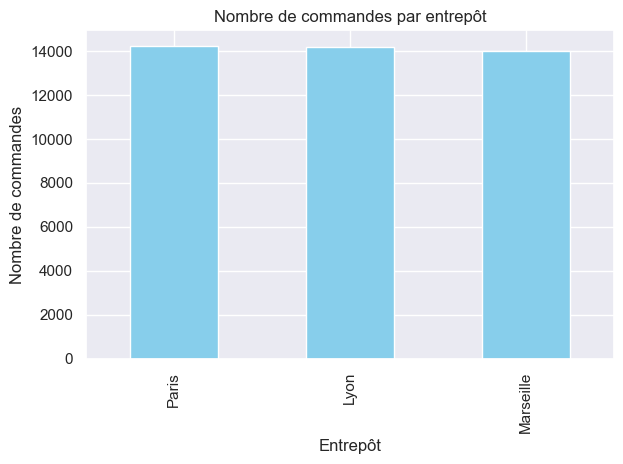

In [34]:
data['entrepôt'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Nombre de commandes par entrepôt")
plt.xlabel("Entrepôt")
plt.ylabel("Nombre de commandes")
plt.tight_layout()
plt.show()


## Quantité totale de produits envoyés par entrepot 

## ## 🎯 Objectif : Quantifier le volume traité par entrepôt

Ce graphique représente la **somme des quantités de produits expédiés** depuis chaque entrepôt.

👉 Cela permet de :
- Identifier les entrepôts à **fort volume logistique**
- Croiser l'activité réelle avec le nombre de commandes
- Ajuster les capacités en fonction du volume traité


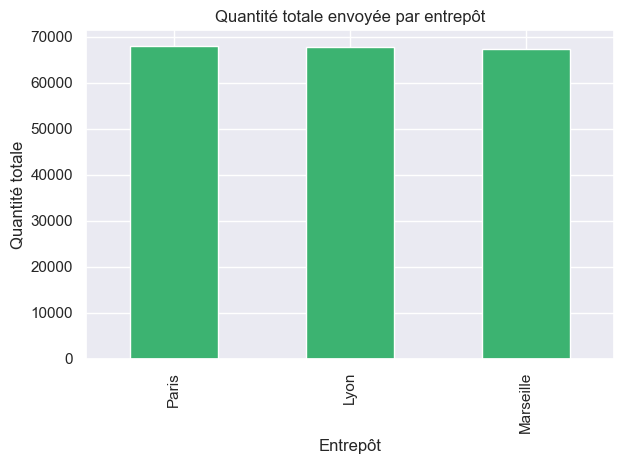

In [35]:
data.groupby('entrepôt')['quantité'].sum().sort_values(ascending=False).plot(kind='bar', color='mediumseagreen')
plt.title("Quantité totale envoyée par entrepôt")
plt.xlabel("Entrepôt")
plt.ylabel("Quantité totale")
plt.tight_layout()
plt.show()


## Quantité moyenne de commandes selon l'entrepot

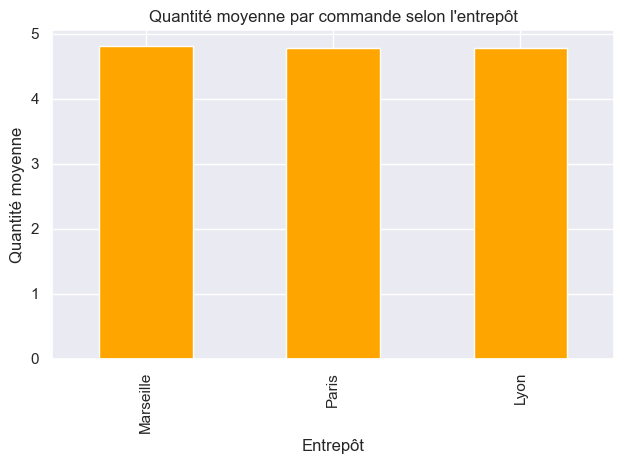

In [36]:
data.groupby('entrepôt')['quantité'].mean().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Quantité moyenne par commande selon l'entrepôt")
plt.xlabel("Entrepôt")
plt.ylabel("Quantité moyenne")
plt.tight_layout()
plt.show()


## Répartition des statuts de commande par entrepôt

## 🎯 Objectif : Étudier la performance opérationnelle des entrepôts

Ce graphe empilé montre la **répartition des statuts de commande** (Livré, Annulé, En cours...) selon chaque entrepôt.

👉 Cela permet de :
- Repérer les entrepôts ayant un **taux élevé d’annulations ou de retards**
- Identifier les **meilleurs performeurs en livraison**
- Mettre en lumière d’éventuels dysfonctionnements locaux


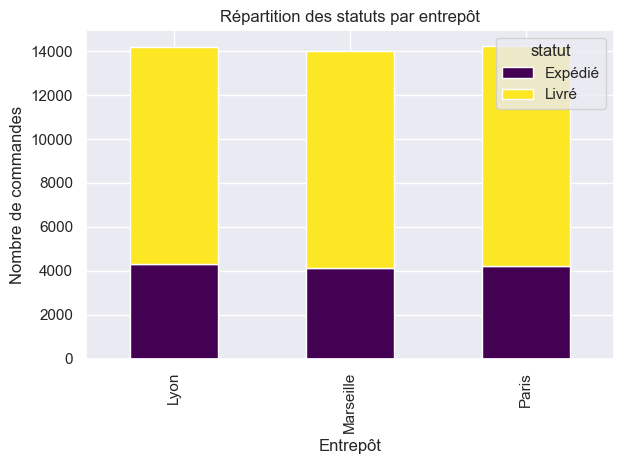

In [37]:
pd.crosstab(data['entrepôt'], data['statut']).plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Répartition des statuts par entrepôt")
plt.xlabel("Entrepôt")
plt.ylabel("Nombre de commandes")
plt.tight_layout()
plt.show()


## 🧾 Synthèse – Analyse des entrepôts

L’objectif de cette section était d’évaluer la performance des différents entrepôts en termes de :
- Volume de commandes traitées
- Quantité totale expédiée
- Taille moyenne des commandes
- Répartition des statuts logistiques

---

### 🔹 1. Nombre de commandes par entrepôt

Les trois entrepôts – Paris, Lyon et Marseille – présentent un **nombre de commandes très proche**, chacun autour de **14 000 commandes**.

👉 Cela montre une **répartition équilibrée de la charge logistique**, sans sur-sollicitation d’un site particulier.

📦 Cette homogénéité est un **bon indicateur d’optimisation opérationnelle**, car elle permet :
- une **meilleure gestion des flux**
- une **répartition des stocks cohérente**
- une réduction potentielle des **délais de livraison** en fonction de la localisation des clients


---

### 🔹 2. Quantité totale envoyée par entrepôt

Les **quantités totales expédiées** par Paris, Lyon et Marseille sont **quasi équivalentes**, chacune aux alentours de **68 000 unités**.

👉 Cela renforce l’idée d’une **stratégie logistique bien équilibrée**, où :
- la **charge en volume** est uniformément répartie,
- chaque entrepôt participe activement à la couverture des besoins clients,
- il n’y a pas de déséquilibre notable dans les flux sortants.

📦 Cette régularité facilite également la **planification des ressources** (transport, personnel, stockage).


---

### 🔹 3. Quantité moyenne par commande selon l’entrepôt

La **quantité moyenne par commande** est très homogène entre les trois entrepôts :
- légèrement plus élevée à **Marseille (~4.8)**,
- suivie de **Paris** et **Lyon** avec des moyennes autour de **4.7**.

👉 Ces écarts minimes montrent que les **profils de commandes sont globalement similaires** d’un entrepôt à l’autre.

📌 Cela peut indiquer :
- une **absence de spécialisation logistique par site**,
- une **bonne standardisation des pratiques de traitement de commande**,
- et une certaine **uniformité dans les attentes ou les comportements clients** selon les zones desservies.


---

### 🔹 4. Répartition des statuts par entrepôt

Chaque entrepôt affiche une **répartition similaire** entre les statuts de commande :
- Une **majorité de commandes livrées** (en jaune),
- Et une **part significative de commandes expédiées** (en violet).

👉 Cette cohérence suggère que les **processus logistiques sont homogènes** entre les différents sites.

📌 Aucun entrepôt ne montre de retard ou de blocage manifeste dans l’acheminement, ce qui témoigne d’un **suivi fluide du cycle de commande** dans l’ensemble du réseau logistique.


---

### ✅ Conclusion

L’analyse des entrepôts met en évidence un **système logistique équilibré et bien réparti** :

- 📦 Les **volumes de commandes** et **quantités expédiées** sont très proches entre Paris, Lyon et Marseille
- ⚙️ Les **traitements logistiques** sont harmonisés, avec des répartitions de statuts similaires
- ✅ Aucun **déséquilibre majeur** ni anomalie apparente entre les différents sites

👉 Cette configuration témoigne d’une **stratégie d’approvisionnement uniforme**, efficace pour garantir :
- des **délais optimisés**,
- une **meilleure couverture territoriale**,
- et une **fluidité dans la chaîne de distribution**.

🧭 Ces constats peuvent servir de base pour aller plus loin :
- analyser les **stocks et retours**
- étudier la **localisation client vs entrepôt**
- ou simuler des **scénarios de redéploiement logistique**



## Pie chart – Répartition globale des statuts

### 🎯 Objectif : Visualiser la répartition globale des statuts

Ce graphique circulaire (camembert) permet de voir **la proportion de chaque statut de commande** :
- Livré
- Expédié
- En attente
- Annulé

👉 Cela permet de :
- Juger globalement de la **performance logistique**
- Vérifier si une **majorité des commandes sont livrées**
- Repérer d’éventuels problèmes (ex. trop d’annulations ou d’attentes)


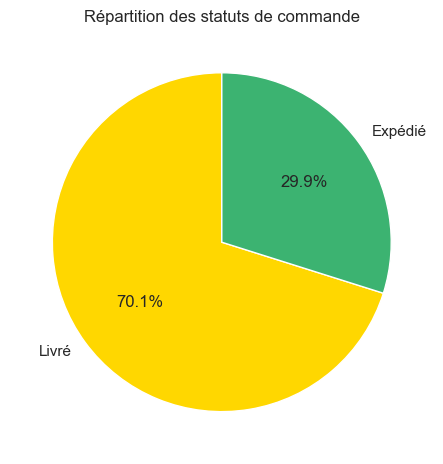

In [38]:
data['statut'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'mediumseagreen', 'slateblue', 'crimson'])
plt.title("Répartition des statuts de commande")
plt.ylabel("")  # Pour retirer le label inutile
plt.tight_layout()
plt.show()


## Statuts en bar chart (version alternative du camembert)

### ## 🎯 Objectif : Comparer les statuts en valeur absolue

Cette version en barres est plus adaptée pour comparer **le nombre exact de commandes** selon chaque statut.

👉 Cela facilite :
- La lecture directe du volume par statut
- Les comparaisons entre états
- La détection des statuts à surveiller (ex. un statut “En attente” trop élevé)


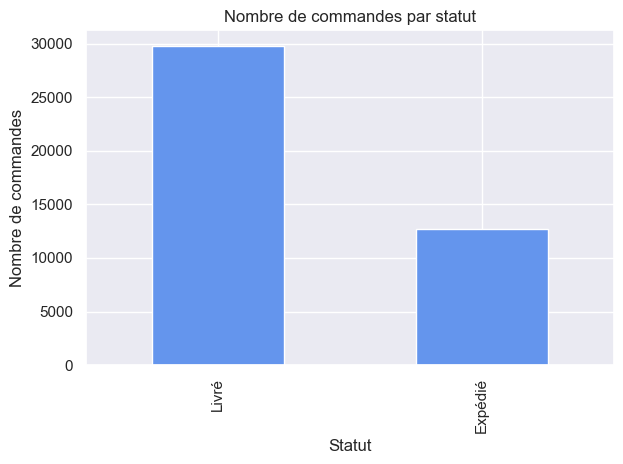

In [39]:
data['statut'].value_counts().plot(kind='bar', color='cornflowerblue')
plt.title("Nombre de commandes par statut")
plt.xlabel("Statut")
plt.ylabel("Nombre de commandes")
plt.tight_layout()
plt.show()


## Bar chart empilé – Évolution mensuelle des statuts

###  🎯 Objectif : Analyser l'évolution des statuts dans le temps

Ce graphique montre comment les différents statuts ont évolué **mois après mois**.

👉 Cette visualisation est utile pour :
- Détecter une **saison** ou une **période critique**
- Observer une **amélioration ou dégradation de la logistique**
- Anticiper les périodes à risque (hausse d’attente ou d’annulation)

Elle est idéale pour compléter l’analyse globale par une vision **temporelle et dynamique**.


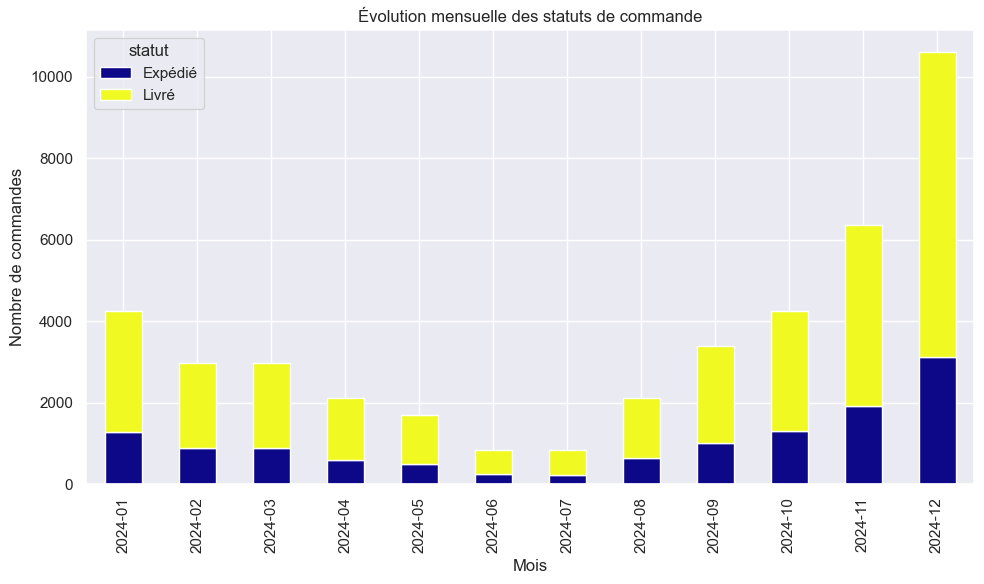

In [40]:
data['date_commande'] = pd.to_datetime(data['date_commande'], errors='coerce')  # Si pas encore converti
data['mois'] = data['date_commande'].dt.to_period('M')

# Plot
pd.crosstab(data['mois'], data['statut']).plot(kind='bar', stacked=True, colormap='plasma', figsize=(10,6))
plt.title("Évolution mensuelle des statuts de commande")
plt.xlabel("Mois")
plt.ylabel("Nombre de commandes")
plt.tight_layout()
plt.show()


## 🧾 Synthèse – Analyse des statuts de commande

L’analyse des statuts permet d’évaluer la **performance globale du processus de commande**.  
Les données révèlent plusieurs tendances intéressantes :

---

### 🔹 1. Répartition globale des statuts de commande

- ✅ **70,1 %** des commandes sont déjà **livrées**
- 🚚 **29,9 %** sont au statut **expédié**, en cours d’acheminement

👉 Ces chiffres montrent une **bonne efficacité logistique** :
- la majorité des commandes atteignent leur destination finale
- une proportion non négligeable est en transit, ce qui est normal dans un cycle de livraison actif

📌 Il peut être pertinent de surveiller :
- les commandes qui **restent longtemps** en statut "expédié"
- les éventuels **retards d’acheminement**

🔎 À noter : les statuts **“en attente”** ou **“annulé”** ne sont pas représentés ici. Il faudra les intégrer dans une vue plus complète si besoin.


---

### 🔹 2. Nombre de commandes par statut (valeurs absolues)

Le graphique en barres confirme clairement que :
- ✅ Le **statut “Livré”** est **largement majoritaire**, avec près de 30 000 commandes
- 🚚 Le **statut “Expédié”** reste significatif mais bien en retrait

👉 Cela reflète une **bonne performance logistique** :
- La majorité des commandes **aboutissent jusqu’au client**
- Un volume non négligeable reste **en cours d’acheminement**, ce qui peut être normal en cours d’exploitation

📌 À surveiller : si les commandes “expédiées” stagnent trop longtemps, cela pourrait indiquer des **goulots d’étranglement** ou des retards de transport.


---

### 🔹 3. Évolution mensuelle des statuts de commande

Ce graphique en barres empilées illustre une **forte saisonnalité** dans les volumes de commandes :

- De **janvier à juillet**, les volumes restent **relativement faibles et stables**
- À partir d’**août/septembre**, on observe une **hausse progressive des commandes**
- Le mois de **décembre** marque un **pic exceptionnel**, notamment pour les commandes “livrées”

👉 Cette tendance est typique d’une **hausse de la demande en fin d’année**, souvent liée à des périodes commerciales (Black Friday, Noël…)

📌 Le volume des commandes “expédiées” suit globalement la même tendance, ce qui indique un **suivi logistique cohérent** face à la montée des volumes.


---

### ✅ Conclusion

L’analyse des statuts montre un **système logistique performant** dans son fonctionnement global :

- ✅ La majorité des commandes sont **livrées dans les délais**
- 🚚 Une part significative est encore au stade **expédié**, ce qui peut être normal dans un cycle de traitement continu
- 📈 Les volumes augmentent fortement en fin d’année, sans dégradation notable des performances

👉 Ces résultats confirment une **bonne maîtrise opérationnelle**, même en période de pic.

📌 Pour aller plus loin, des analyses sur les **temps de transit**, les **commandes restées longtemps en expédition**, ou les **cas d’annulation/retour** permettraient d’identifier des axes d’optimisation supplémentaires.


## Nombre de commandes par mois

### 🎯 Objectif : Analyser la tendance des commandes dans le temps

Ce graphique permet de visualiser **le nombre de commandes enregistrées chaque mois**.

👉 Cette courbe permet de :
- Détecter des **périodes d’activité intense** (ex. saisonnalité, événements)
- Repérer des **baisses de régime** ou des creux d’activité
- Observer une **tendance globale** : croissance, stabilité ou baisse

Elle est idéale pour anticiper des pics de demande ou pour **planifier l’approvisionnement**.


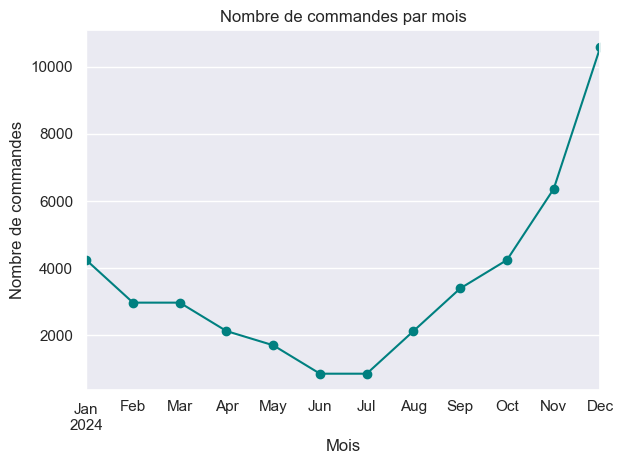

In [41]:
data['date_commande'] = pd.to_datetime(data['date_commande'], errors='coerce')  # Si ce n’est pas encore fait
data['mois'] = data['date_commande'].dt.to_period('M')

# Nombre de commandes par mois
data['mois'].value_counts().sort_index().plot(kind='line', marker='o', color='teal')
plt.title("Nombre de commandes par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de commandes")
plt.grid(True)
plt.tight_layout()
plt.show()


## Quantité totale commandée par mois

### 🎯 Objectif : Étudier les volumes de produits expédiés dans le temps

Ce graphique représente la **quantité totale de produits commandés chaque mois**, indépendamment du nombre de commandes.

👉 Il permet de :
- Comparer les **mois légers** et les **mois lourds** en volume logistique
- Repérer si la **taille moyenne des commandes varie**
- Anticiper les **besoins de stock** ou de renfort opérationnel selon les périodes

Cela complète bien la courbe du nombre de commandes en apportant une dimension **quantitative**.


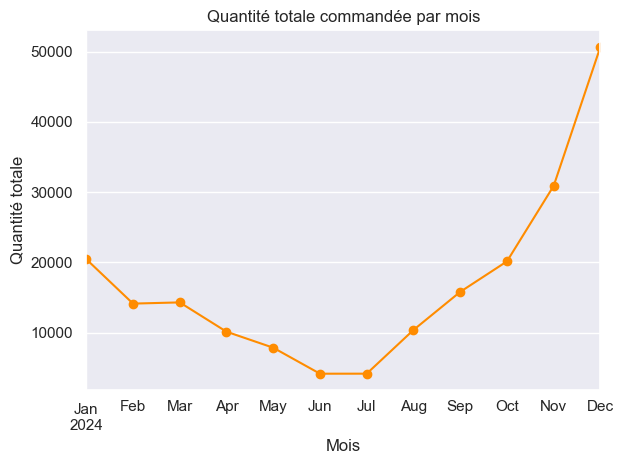

In [42]:
data.groupby(data['mois'])['quantité'].sum().sort_index().plot(kind='line', marker='o', color='darkorange')
plt.title("Quantité totale commandée par mois")
plt.xlabel("Mois")
plt.ylabel("Quantité totale")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🧾 Synthèse – Analyse temporelle des commandes

Cette partie visait à comprendre **comment les commandes évoluent au fil des mois**.  
L'objectif était de repérer des **tendances**, des **pics**, ou des **périodes creuses**.

---

### 🔹 1. Nombre de commandes par mois

L’évolution du nombre de commandes au fil des mois révèle une **tendance saisonnière marquée** :

- 📉 Une **forte baisse progressive** est visible de **janvier à juillet**, atteignant un creux en été
- 📈 À partir d’**août**, le volume repart à la hausse
- 🎯 Le mois de **décembre** enregistre un **pic spectaculaire** avec plus de 10 000 commandes

👉 Cette tendance peut s’expliquer par :
- Des périodes **creuses estivales** (baisse d’activité)
- Un regain d’activité lié à la **fin d’année commerciale** (Black Friday, fêtes)
- Des stratégies promotionnelles ou campagnes de fin d’année

🧭 Cette information est **cruciale pour l’anticipation logistique**, la gestion des stocks et l’optimisation des effectifs en haute saison.


---

### 🔹 2. Quantité totale commandée par mois

La courbe des quantités commandées reflète **fidèlement la dynamique du nombre de commandes** :

- 📉 Les volumes chutent fortement de **janvier à juillet**
- 📈 Une **remontée progressive** s’amorce en **août**
- 🚀 Le mois de **décembre** atteint un **niveau record de plus de 50 000 unités commandées**

👉 Cette synchronisation entre la fréquence des commandes et les volumes confirme une **hausse réelle de la demande**, et non simplement une augmentation du nombre de petites commandes.

📌 En décembre, la **hausse des volumes est très marquée**, ce qui implique :
- Une **hausse de la charge logistique**
- Des besoins accrus en **ressources humaines et stocks**
- Des **ajustements stratégiques à anticiper** sur les pics saisonniers


---

### ✅ Conclusion

L’analyse temporelle met en lumière une **saisonnalité forte** dans l’activité de commandes :

- 📉 Une **forte baisse** d’activité de janvier à juillet
- 📈 Une **reprise nette** dès août, culminant avec un **pic exceptionnel en décembre**
- Des **mois stratégiques** (fin d’année notamment) à anticiper

🧠 Ces enseignements sont essentiels pour adapter :
- Les **ressources humaines** (renforts en fin d’année)
- Les **opérations marketing** (ciblage des pics)
- La **gestion des stocks et de la logistique** (capacités de traitement accrues en haute saison)



## Top produits par entrepôt

### 🎯 Objectif : Identifier les produits phares par entrepôt

Cette analyse permet de repérer les **produits les plus commandés dans chaque entrepôt**.

👉 Utile pour :
- Comprendre la **spécialisation logistique locale**
- Adapter l’**approvisionnement produit** selon la demande régionale
- Optimiser les **stocks localement** au lieu d’avoir une stratégie uniforme


In [43]:
# Top produits par entrepôt
top_produits_entrepot = data.groupby(['entrepôt', 'id_produit'])['quantité'].sum().reset_index()
top_produits = top_produits_entrepot.sort_values(['entrepôt', 'quantité'], ascending=[True, False])

# Afficher les top 5 produits par entrepôt
top_produits.groupby('entrepôt').head(5)


,entrepôt,id_produit,quantité
179,Lyon,P00182,451
141,Lyon,P00143,425
535,Lyon,P00541,403
443,Lyon,P00449,397
970,Lyon,P00981,387
1591,Marseille,P00620,397
1721,Marseille,P00754,382
1174,Marseille,P00188,367
991,Marseille,P00002,361
1935,Marseille,P00971,359


## Quantité moyenne par statut

### ## 🎯 Objectif : Comprendre le lien entre statut et volume commandé

Ce graphe analyse la **quantité moyenne commandée** selon le statut final de la commande.

👉 Intérêt :
- Voir si certaines commandes (“Livré”) sont **plus importantes** que d'autres (“Annulé” ou “En attente”)
- Aider à comprendre la **valeur réelle des statuts**, pas juste leur fréquence
- Donner une **vue business** sur la performance réelle de la chaîne logistique


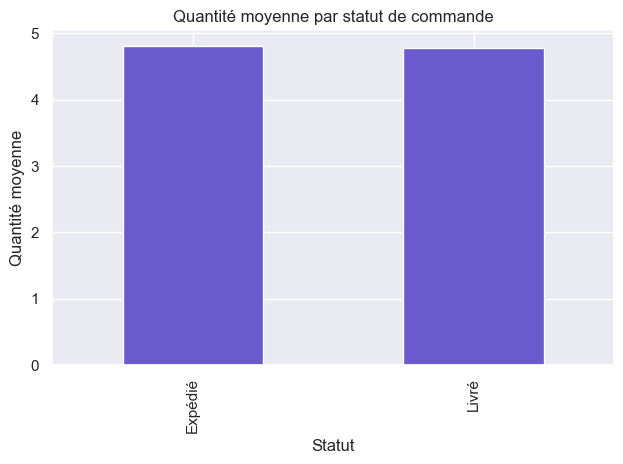

In [45]:
data.groupby('statut')['quantité'].mean().sort_values(ascending=False).plot(kind='bar', color='slateblue')
plt.title("Quantité moyenne par statut de commande")
plt.ylabel("Quantité moyenne")
plt.xlabel("Statut")
plt.tight_layout()
plt.show()


##  Heatmap entrepôt × statut
## 🎯 Objectif : Croiser l’analyse entre lieux et statuts

Cette heatmap croise **les entrepôts** avec **les statuts de commande** pour une lecture rapide des volumes.

👉 Elle permet de :
- Visualiser les **points forts et faibles par entrepôt**
- Comparer les performances de manière synthétique
- Détecter les **déséquilibres ou anomalies** (ex. un entrepôt avec beaucoup d’“en attente”)

C’est un excellent outil de diagnostic visuel.


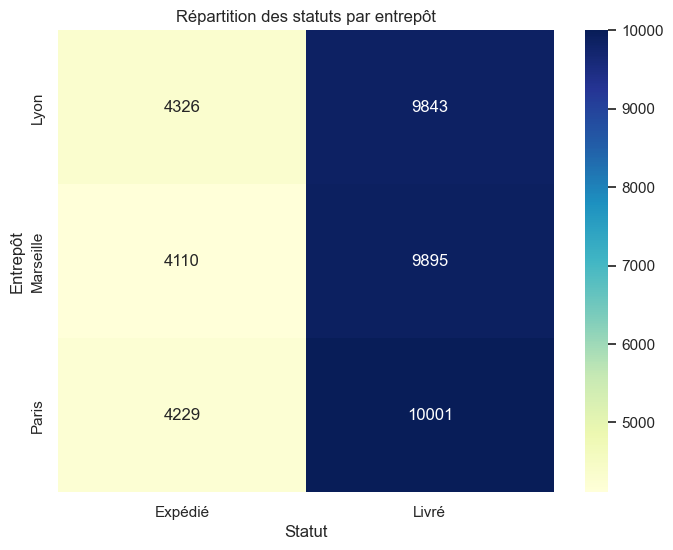

In [61]:
# Table croisée propre
table_statut_entrepot = data.pivot_table(index='entrepôt', columns='statut', aggfunc='size', fill_value=0)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(table_statut_entrepot, annot=True, fmt="d", cmap='YlGnBu')
plt.title("Répartition des statuts par entrepôt")
plt.ylabel("Entrepôt")
plt.xlabel("Statut")
plt.show()


### 📌 Remarque sur l’interprétation des statuts

Il peut sembler surprenant d'observer **davantage de commandes “Livrées” que “Expédiées”**.

➡️ Cela s’explique par le fait que dans ce dataset, **chaque commande n’a qu’un seul statut enregistré** : son **état final ou actuel**.

Ainsi :
- Une commande **livrée** n’est **plus comptée** comme “expédiée”
- Les commandes “expédiées” correspondent uniquement à celles qui sont **en transit**, **pas encore livrées**

👉 Il est donc tout à fait normal que le nombre de commandes “Livrées” soit **supérieur** au nombre de commandes “Expédiées”.

📌 Pour analyser toute la chaîne (de l’expédition à la livraison), il faudrait disposer d’un **suivi d’historique des statuts** par commande, ce qui n’est pas le cas ici.


## Boxplots

### 🎯 Objectif : Visualiser la répartition des quantités selon les entrepôts et les statuts

Ce graphique combine plusieurs **boxplots** dans une seule visualisation pour comparer :

- La **distribution des quantités commandées**
- Selon les **entrepôts** (Paris, Lyon, Marseille)
- Et les **statuts de commande** (Livré, Annulé, etc.)

---

### 🔍 Lecture :
- Chaque groupe de boxplots correspond à un **entrepôt** (ou un statut selon l’axe choisi)
- Les couleurs représentent les différents **statuts** (ou entrepôts si inversé)
- La taille des boîtes donne une idée de la **variabilité des quantités**
- Les points ou valeurs éloignées sont des **valeurs extrêmes (outliers)**

---

### 🧠 Intérêt :
- Identifier des écarts entre **entrepôts** sur certaines commandes
- Repérer des statuts avec des **commandes inhabituelles** ou risquées
- Aider à ajuster les pratiques logistiques selon les profils

Ce type de graphique permet une **analyse croisée fine et visuelle** à partir de plusieurs variables clés du dataset.


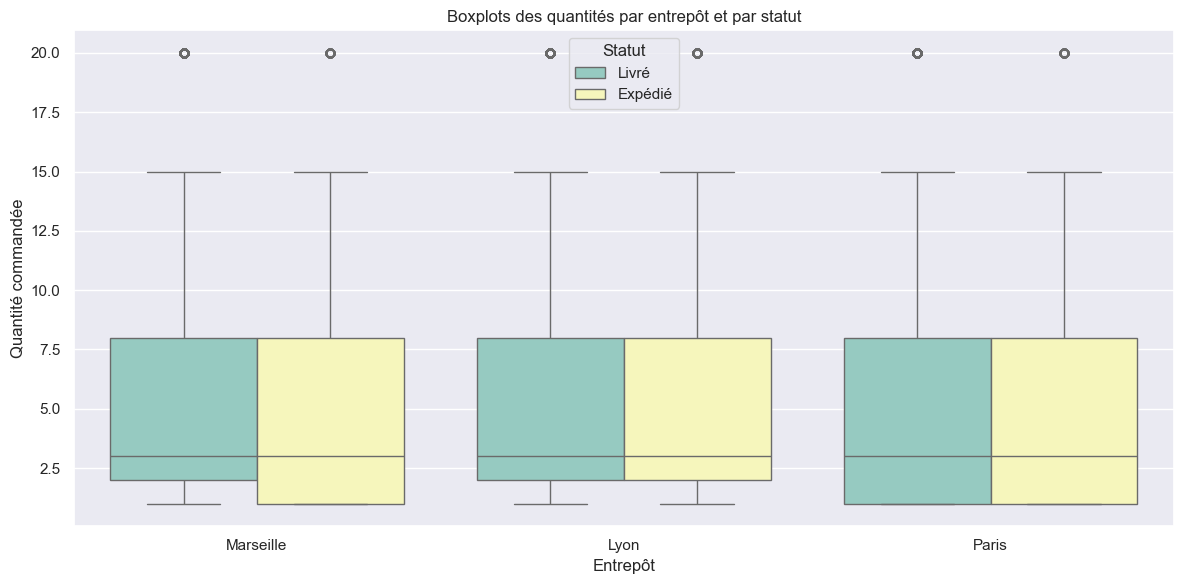

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='entrepôt', y='quantité', hue='statut', palette='Set3')
plt.title("Boxplots des quantités par entrepôt et par statut")
plt.xlabel("Entrepôt")
plt.ylabel("Quantité commandée")
plt.legend(title="Statut")
plt.tight_layout()
plt.show()


### 📦 Analyse des quantités commandées par entrepôt et par statut (Boxplot)

Ce boxplot croisé permet de visualiser la **distribution des quantités commandées** selon :
- Le **lieu d’expédition** (`entrepôt`)
- Le **statut** de la commande (`Livré` ou `Expédié`)

#### ✅ Observations :
- Les **médianes** sont très proches pour tous les entrepôts (~2 à 3 unités), ce qui confirme une **homogénéité des commandes**.
- La **variabilité** (étendue interquartile) est similaire entre les entrepôts et les statuts.
- Quelques **valeurs extrêmes** (outliers) sont visibles au-delà de 15 unités, mais restent marginales.
- Aucun entrepôt ne montre de **déviation significative** par rapport aux autres, que ce soit en “Livré” ou “Expédié”.

#### 🎯 Conclusion :
👉 Le comportement des commandes est **stable et cohérent** entre les différents entrepôts, quel que soit leur statut logistique.  
Cela renforce l’idée d’un **traitement uniforme des commandes** à l’échelle nationale.


## 🧪 Phase finale de préparation des données

---

### 🔁 1. Encodage des variables catégorielles

Les variables comme `statut`, `entrepôt`, ou `id_produit` sont de type **texte (catégorielles)**, elles doivent être converties en format **numérique** pour pouvoir être exploitées par les algorithmes ou les corrélations.

---

### 📏 2. Normalisation des variables numériques

Certaines variables numériques comme `quantité` ont des **ordres de grandeur différents**.  
On les ramène à une échelle comparable (entre 0 et 1 par exemple) pour :

- éviter les biais de poids
- faciliter les calculs de distance ou corrélation
- préparer d’éventuelles techniques de Machine Learning

---

Cette étape rend le jeu de données **entièrement prêt à l’analyse avancée** ✅



## Encodage des variables catégorielles

Certaines colonnes comme `statut`, `entrepôt`, ou `id_produit` sont des variables de type **catégoriel** (texte).  
Elles ne peuvent pas être utilisées directement dans des calculs numériques ou algorithmes de Machine Learning.

👉 On applique ici un **encodage one-hot** :  
Chaque modalité devient une colonne binaire (0 ou 1), ce qui permet une **interprétation logique et efficace**.

Exemple :
- `entrepôt` → `entrepôt_Lyon`, `entrepôt_Marseille` (et `entrepôt_Paris` est implicite car supprimé avec `drop_first=True`)


In [48]:
# 🔁 Encodage One-Hot
data_encoded = pd.get_dummies(data, columns=['statut', 'entrepôt'], drop_first=True)

# 🎯 Convertir uniquement les colonnes booléennes en int
for col in data_encoded.select_dtypes(include='bool').columns:
    data_encoded[col] = data_encoded[col].astype(int)

# 🔍 Vérification
data_encoded.head()



,id_commande,date_commande,id_produit,quantité,mois,statut_Livré,entrepôt_Marseille,entrepôt_Paris
0,O000001,2024-09-03,P00413,2,2024-09,1,1,0
1,O000002,2024-11-09,P00778,15,2024-11,0,0,0
2,O000004,2024-11-03,P00535,8,2024-11,1,0,0
3,O000006,2024-01-24,P00898,3,2024-01,1,0,1
4,O000007,2024-02-15,P00445,1,2024-02,1,0,0


## Normalisation des variables numériques

Les variables comme `quantité` peuvent avoir des valeurs très différentes en échelle (ex : de 1 à 1000).  
Cela peut fausser certains calculs, notamment :
- les **distances** (clustering, KNN…)
- les **corrélations**
- les **pondérations** dans des modèles

👉 On applique ici une **normalisation Min-Max** pour ramener les valeurs entre **0 et 1**  
Cela garantit une **comparabilité des échelles** entre les différentes variables.

Cette étape est cruciale avant une analyse statistique avancée ou un algorithme d'apprentissage automatique.


In [49]:
from sklearn.preprocessing import MinMaxScaler

# 🔍 Sélection des colonnes numériques à normaliser
colonnes_numeriques = ['quantité']  # Tu peux ajouter d'autres si besoin

# 📏 Normalisation Min-Max (entre 0 et 1)
scaler = MinMaxScaler()
data_encoded[colonnes_numeriques] = scaler.fit_transform(data_encoded[colonnes_numeriques])

# 📊 Vérification du résultat
data_encoded.describe()


,date_commande,quantité,statut_Livré,entrepôt_Marseille,entrepôt_Paris
count,42404,42404.000000,42404.000000,42404.000000,42404.000000
mean,2024-08-12 08:01:58.856711680,0.199411,0.701325,0.330275,0.335582
min,2024-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2024-04-07 00:00:00,0.052632,0.000000,0.000000,0.000000
50%,2024-10-01 00:00:00,0.105263,1.000000,0.000000,0.000000
75%,2024-12-01 00:00:00,0.368421,1.000000,1.000000,1.000000
max,2024-12-31 00:00:00,1.000000,1.000000,1.000000,1.000000
std,NaN,0.234860,0.457682,0.470318,0.472199


## 📈 Matrice de corrélation

Cette matrice permet d’**étudier les relations linéaires** entre les différentes variables numériques du dataset (quantité, statut encodé, entrepôt encodé…).

👉 Elle est utile pour :
- Détecter des **corrélations fortes** ou des **doublons**
- Identifier des variables **influentes ou explicatives**
- Préparer une **sélection de variables** pertinente pour la suite (ex : prédictions, clustering)

Cette visualisation est particulièrement importante avant d'entraîner un modèle de machine learning.


C:\Users\glenn\AppData\Local\Temp\ipykernel_18256\833026542.py:8: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\glenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


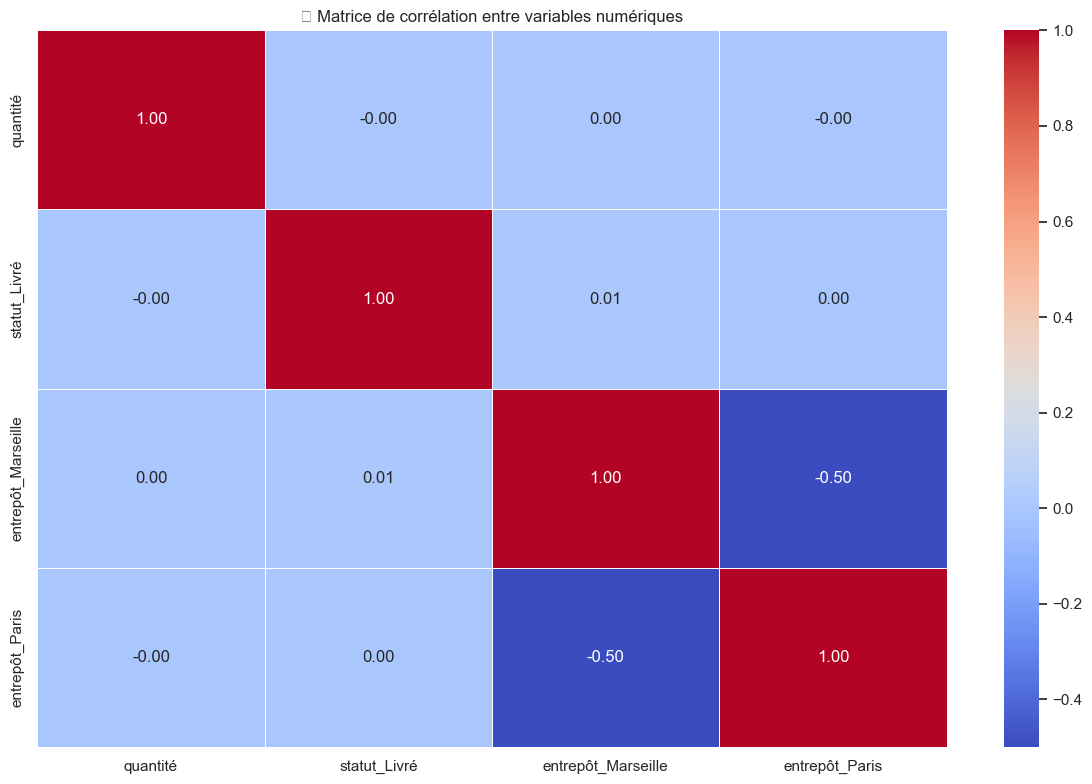

In [50]:

# 🔍 Calcul de la matrice de corrélation uniquement sur les variables numériques
correlation_matrix = data_encoded.corr(numeric_only=True)

# 🎨 Affichage avec heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("🔗 Matrice de corrélation entre variables numériques")
plt.tight_layout()
plt.show()


### 🔗 Matrice de corrélation entre variables numériques

Cette matrice permet d’analyser les **liens linéaires** entre les variables numériques après encodage (one-hot) des colonnes catégorielles.

#### ✅ Observations :

- `quantité` n’est **corrélée significativement à aucune autre variable**, ce qui indique que la **quantité commandée est relativement indépendante** du statut ou de l'entrepôt.
- La corrélation entre `statut_Livré` et les entrepôts est très **faible**, ce qui montre une **distribution équilibrée des livraisons** entre les entrepôts.
- Le seul lien fort est une **corrélation négative (-0.50)** entre `entrepôt_Paris` et `entrepôt_Marseille`, ce qui est attendu car ces variables sont issues d’un **encodage binaire (one-hot)** :  
  👉 Un entrepôt ne peut pas être à la fois Paris et Marseille.

#### 🎯 Conclusion :

👉 La matrice montre que les variables sont **globalement peu corrélées**, ce qui est intéressant pour éviter les redondances lors d’une modélisation.  
On pourra donc envisager l’étape suivante : **sélection de variables ou modélisation prédictive** sans risques de colinéarité majeure.

